In [84]:
# 기존실습과 다름

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/medical2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 검증합니다.
- 성능이 좋을 것으로 판단된 모델로 예측을 수행합니다.
- 예측된 결과를 기존 평가 파일에 병합합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [85]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [86]:
# 학습 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance_train.csv'
data1 = pd.read_csv(path)

# 평가 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance_test.csv'
data2 = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [87]:
# 학습 데이터 살펴보기
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,41,female,31.600,0,no,southwest,6186.1270
1,30,male,25.460,0,no,northeast,3645.0894
2,18,female,30.115,0,no,northeast,21344.8467
3,61,female,29.920,3,yes,southeast,30942.1918
4,34,female,27.500,1,no,southwest,5003.8530


**데이터 설명**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

In [88]:
# 평가 데이터 살펴보기
data2.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [89]:
# 학습 데이터 기술통계 확인
data1.describe()

,age,bmi,children,charges
count,1238.000000,1238.000000,1238.000000,1238.000000
mean,39.236672,30.648522,1.096931,13164.000669
std,13.984795,6.129289,1.203057,11994.023291
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4755.809850
50%,40.000000,30.305000,1.000000,9333.014350
75%,51.000000,34.496250,2.000000,16443.294663
max,64.000000,53.130000,5.000000,63770.428010


In [90]:
# 평가 데이터 기술통계 확인
data2.describe()

,age,bmi,children
count,100.000000,100.000000,100.000000
mean,38.840000,30.847550,1.070000
std,14.902186,5.724912,1.241171
min,18.000000,17.385000,0.000000
25%,26.750000,26.528750,0.000000
50%,37.000000,30.980000,1.000000
75%,55.000000,35.547500,2.000000
max,64.000000,42.130000,5.000000


<AxesSubplot:ylabel='charges'>

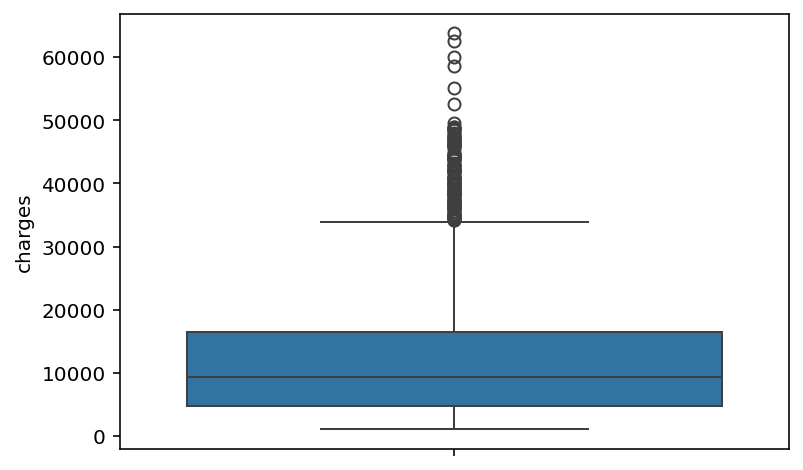

In [91]:
# 학습 데이터 Target 분포 시각화 plt.hist. plt.boxplot
sns.boxplot(data1['charges'])

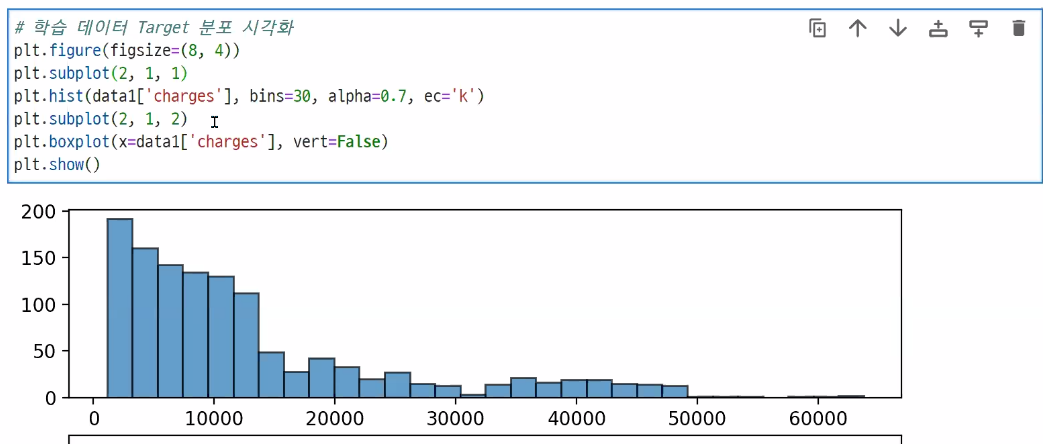

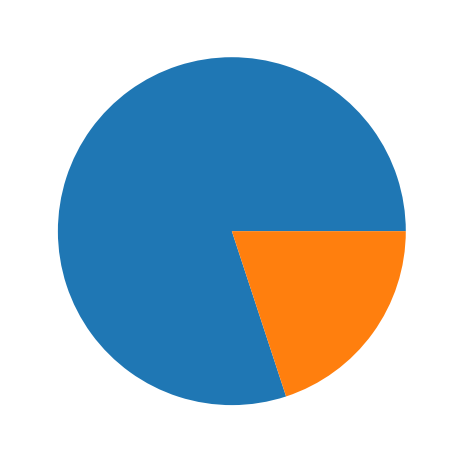

In [92]:
# 학습 데이터 흡연자 비율 시각화 sns.counplot
plt.pie(data1['smoker'].value_counts())
plt.show()

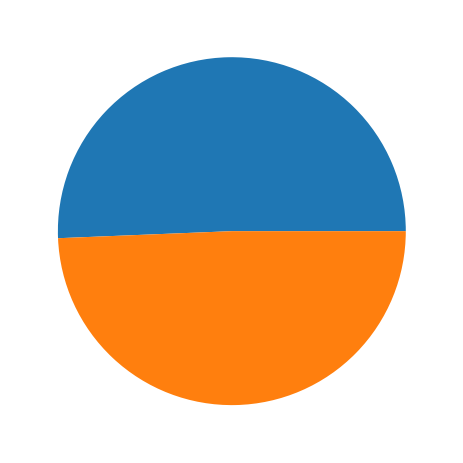

In [93]:
# 학습 데이터 남녀 비율 시각화 sns.counplot
plt.pie(data1['sex'].value_counts())
plt.show()

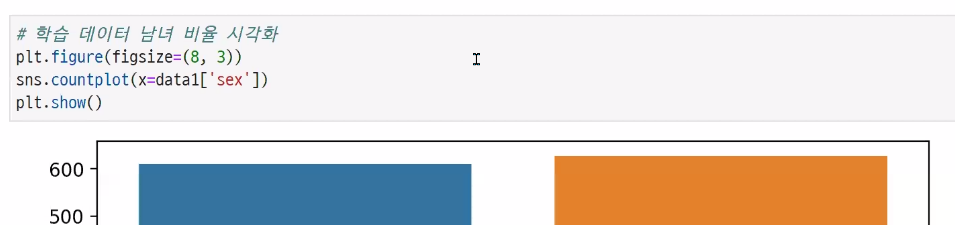

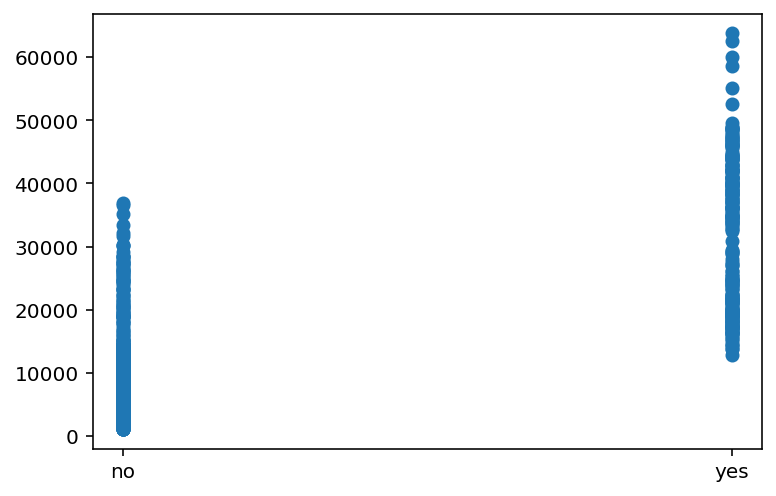

In [94]:
# 학습 데이터 흡연 여부에 따른 의료비 시각화 / sns.histplot
plt.scatter(x=data1['smoker'], y=data1['charges'])
plt.show()

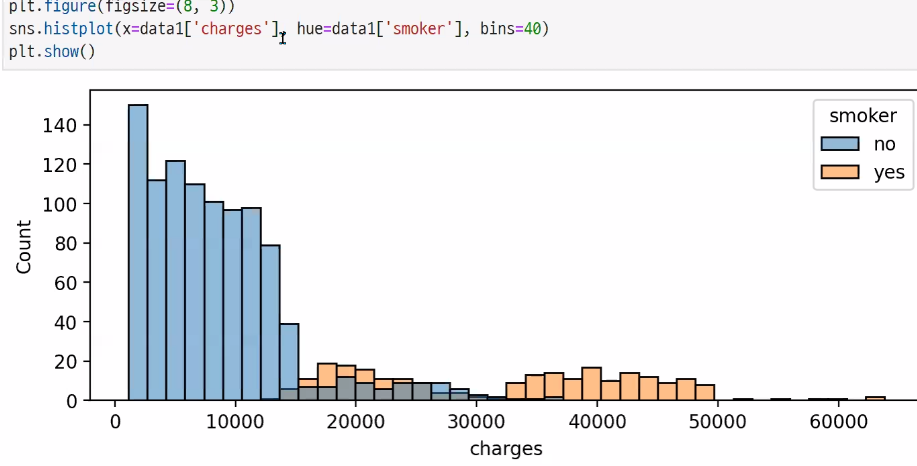

# 3.데이터 준비

- 학습 데이터를 전처리해 모델링을 진행할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- Target 변수를 선정하고, x, y로 분리합니다.

In [95]:
# target 확인
target='charges'

# 데이터 분리
x = data1.drop(target, axis=1)
y = data1.loc[:, target]


**2) 가변수화**

- 가변수화를 수행합니다.
- 문자열 변수에 대해서는 필히 가변수화를 수행합니다.

In [96]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1238 non-null   int64  
 1   sex       1238 non-null   object 
 2   bmi       1238 non-null   float64
 3   children  1238 non-null   int64  
 4   smoker    1238 non-null   object 
 5   region    1238 non-null   object 
 6   charges   1238 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.8+ KB


In [97]:
# 가변수화 대상
cols=['sex', 'smoker', 'region']

# 가변수화
x = pd.get_dummies(x, cols, drop_first=True, dtype=int)

# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,41,31.600,0,0,0,0,0,1
1,30,25.460,0,1,0,0,0,0
2,18,30.115,0,0,0,0,0,0
3,61,29.920,3,0,1,0,1,0
4,34,27.500,1,0,0,0,0,1


**3) 학습용, 검증용 데이터 분리**

- 학습용, 검증용 데이터를 7:3으로 분리합니다.

In [98]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

**4) 정규화**

- KNN 알고리즘을 위해 정규화를 수행합니다.
- 정규화 결과는 별도 변수로 준비해 둡니다. 예) x_train_s, x_val_s

In [99]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()

x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

# 4.모델링

- 여러 알고리즘으로 최적의 성능을 갖는 모델을 만들고 성능을 검증합니다.
- 검증된 성능 정보를 수집해 비교하여 가장 좋은 성능을 보이는 모델을 선택합니다.
- 모델 이름은 알고리즘마다 다르게 합니다. 예) model_lr, model_dt,...

In [100]:
# xgboost 설치
# !pip install xgboost

In [101]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [102]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

**1) KNN**

- KNN 알고리즘으로 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.

In [103]:
# 매개변수 범위('n_neighbors': range(1, 21))
params = {'n_neighbors' : range(1,21)}

# 모델 선언
model_knn = GridSearchCV(KNeighborsRegressor(),
                        params,
                        cv=5)
# 학습
model_knn.fit(x_train_s, y_train)

# 매개변수와 성능 확인
print('최적파라미터:', model_knn.best_params_)
print('최고성능:', model_knn.best_score_)

최적파라미터: {'n_neighbors': 6}
최고성능: 0.7361696913798543


- 검증 데이터로 성능을 검증하고, 검증된 성능 정보를 수집해 다른 모델과 비교합니다.

In [104]:
# 예측하기
y_val_pred = model_knn.predict(x_val_s)

# 검증하기
print(mean_absolute_error(y_val, y_val_pred))
print(r2_score(y_val, y_val_pred))

# 성능정보 수집(R2 Score)
result ={}
result['KNN'] = r2_score(y_val, y_val_pred)
result

3897.5510607325264
0.7495771557226718


{'KNN': 0.7495771557226718}

**2) Decision Tree**

- Decision Tree 알고리즘으로 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.

In [105]:
# 매개변수 범위('max_depth': range(1, 11))
params = {'max_depth' : range(1,11)}

# 모델 선언
model_dt = GridSearchCV(DecisionTreeRegressor(),
                        params,
                        cv=5)

# 학습
model_dt.fit(x_train, y_train)

# 매개변수와 성능 확인
print('최적파라미터:', model_dt.best_params_)
print('최고성능:', model_dt.best_score_)


최적파라미터: {'max_depth': 4}
최고성능: 0.83462894168412


- 검증 데이터로 성능을 검증하고, 검증된 성능 정보를 수집해 다른 모델과 비교합니다.

In [106]:
# 예측하기
y_val_pred = model_dt.predict(x_val)

# 검증하기
print(mean_absolute_error(y_val, y_val_pred))
print(r2_score(y_val, y_val_pred))

# 성능정보 수집(R2 Score)
result['Decision Tree'] = r2_score(y_val, y_val_pred)
result

2973.7554696468937
0.8577535714634761


{'KNN': 0.7495771557226718, 'Decision Tree': 0.8577535714634761}

**3) Random Forest**

- Random Forest 알고리즘으로 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.

In [114]:
# 매개변수 범위('max_depth': range(1, 11))
params = {'max_depth' : range(1,11)}

# 모델 선언
model_rf = GridSearchCV(RandomForestRegressor(),
                       params,
                       cv=5)

# 학습
model_rf.fit(x_train, y_train)

# 매개변수와 성능 확인
print('최적파라미터:', model_rf.best_params_)
print('최고성능:', model_rf.best_score_)

최적파라미터: {'max_depth': 4}
최고성능: 0.8462606080893968


- 검증 데이터로 성능을 검증하고, 검증된 성능 정보를 수집해 다른 모델과 비교합니다.

In [123]:
# 예측하기
y_val_pred = model_rf.predict(x_val)

# 검증하기
print(mean_absolute_error(y_val, y_val_pred))
print(r2_score(y_val, y_val_pred))

# 성능정보 수집(R2 Score)
result['Random Forest'] = r2_score(y_val, y_val_pred)
result

2687.0973545260695
0.8688463706341002


{'KNN': 0.7495771557226718,
 'Decision Tree': 0.8577535714634761,
 'Random Forest': 0.8688463706341002,
 'XGBoost': 0.8529091353995972}

**4) XGBoost**

- XGBoost 알고리즘으로 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.

In [124]:
# 매개변수 범위('max_depth': range(1, 11))
params = {'max_depth' : range(1,11)}

# 모델 선언
model_xgb = GridSearchCV(XGBRegressor(),
                       params,
                       cv=5)

# 학습
model_xgb.fit(x_train, y_train)

# 매개변수와 성능 확인
print('최적파라미터:', model_xgb.best_params_)
print('최고성능:', model_xgb.best_score_)

최적파라미터: {'max_depth': 2}
최고성능: 0.8378970289226093


- 검증 데이터로 성능을 검증하고, 검증된 성능 정보를 수집해 다른 모델과 비교합니다.

In [125]:
# 예측하기
y_val_pred = model_xgb.predict(x_val)

# 검증하기
print(mean_absolute_error(y_val, y_val_pred))
print(r2_score(y_val, y_val_pred))

# 성능정보 수집(R2 Score)
result['XGBoost'] = r2_score(y_val, y_val_pred)
result

2755.2192463530114
0.8529091353995972


{'KNN': 0.7495771557226718,
 'Decision Tree': 0.8577535714634761,
 'Random Forest': 0.8688463706341002,
 'XGBoost': 0.8529091353995972}

# 5.성능 비교

- 검증된 각 모델의 성능을 비교합니다.

In [126]:
print('=' * 40)
for m_name, score in result.items(): #★
    print(m_name, score.round(3))
print('=' * 40)

KNN 0.75
Decision Tree 0.858
Random Forest 0.869
XGBoost 0.853


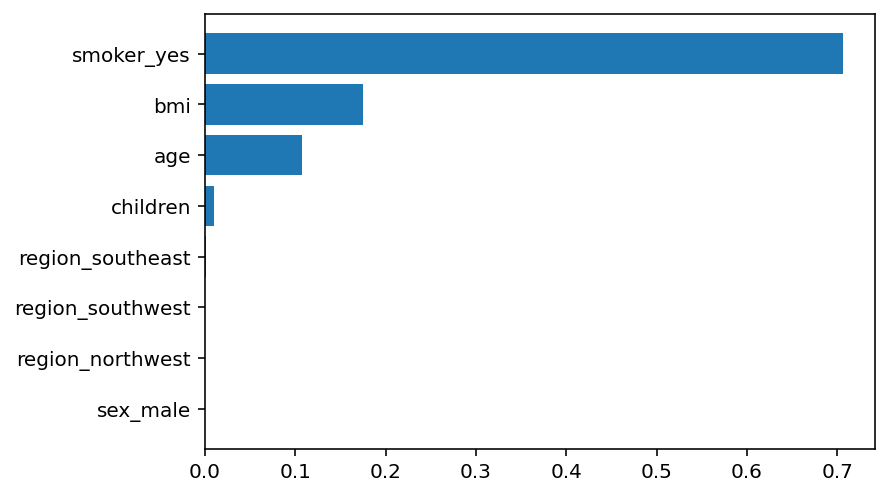

In [128]:
# 데이터프레임 만들기
df = pd.DataFrame()
df['feature'] = list(x)
df['importance'] = model_rf.best_estimator_.feature_importances_
df.sort_values(by='importance', ascending=True, inplace=True)

# 확인
plt.barh(y=df['feature'], width=df['importance'])
plt.show()

# 6.최종 예측

- 가장 성능이 좋다고 검증된 모델로 평가 데이터에 대해 예측을 수행합니다.
- 평가 데이터 정답이 없으므로 예측 결과에 대한 평가를 수행할 수는 없습니다.

**1) 평가 데이터 준비**

- 평가 대상 데이터를 준비합니다.

In [129]:
# 평가 데이터
x_test = data2

# 확인
x_test.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


**2) 가변수화**

- 학습 데이터와 동일한 변수를 갖도록 가변수화를 수행합니다.

In [130]:
# 가변수화 대상
cols=['sex', 'smoker', 'region']

# 가변수화
x_test = pd.get_dummies(x_test, cols, drop_first=True, dtype=int)

# 확인
x_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**3) 예측하기**

- 가장 좋은 성능을 검증 받은 모델로 예측을 수행합니다.

In [131]:
# 예측하기
y_pred = model_rf.predict(x_test)

In [132]:
# 예측값 확인
y_pred[:3]

array([17924.42225858,  4885.19493028,  6601.37142477])

**4) 예측 결과 병합**

- 예측된 결과를 평가 데이터 파일에 새로운 열로 추가합니다.

In [133]:
# 예측 결과 병합
data2['prd_charges'] = y_pred

# 롹인
data2.head()

,age,sex,bmi,children,smoker,region,prd_charges
0,19,female,27.900,0,yes,southwest,17924.422259
1,18,male,33.770,1,no,southeast,4885.194930
2,28,male,33.000,3,no,southeast,6601.371425
3,33,male,22.705,0,no,northwest,5422.738661
4,32,male,28.880,0,no,northwest,5248.429172


In [ ]:
# data2에는 y_test 값 없다

In [134]:
# 파일 저장
data2.to_excel('insurance_predicted.xlsx', index=False)

In [139]:
pd.read_excel('insurance_predicted.xlsx')

,age,sex,bmi,children,smoker,region,prd_charges
0,19,female,27.900,0,yes,southwest,17924.422259
1,18,male,33.770,1,no,southeast,4885.194930
2,28,male,33.000,3,no,southeast,6601.371425
3,33,male,22.705,0,no,northwest,5422.738661
4,32,male,28.880,0,no,northwest,5248.429172
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,6182.656325
96,54,female,30.800,3,no,southwest,13167.195754
97,55,male,38.280,0,no,southeast,13160.438194
98,56,male,19.950,0,yes,northeast,24479.663316
